<a href="https://colab.research.google.com/github/rajantripathi/Complete-Python-3-Bootcamp/blob/master/loading_image_from_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/CV-TF1.X-2.X/pics'

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [8]:
# define training dataset

train_ds = tf.keras.utils.image_dataset_from_directory(path ,
                                    image_size = (180,180),
                                    label_mode = 'int',
                                    validation_split = 0.2,
                                    subset = 'training',
                                    color_mode = 'rgb',
                                    seed  = 2022,
                                    batch_size = 5)

Found 11 files belonging to 2 classes.
Using 9 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(path,
                                    image_size = (180,180),
                                    label_mode = 'int',
                                    validation_split = 0.2,
                                    subset = 'validation',
                                    color_mode = 'rgb',
                                    seed  = 2022,
                                    batch_size = 5)

Found 11 files belonging to 2 classes.
Using 2 files for validation.


In [9]:
for img , label in train_ds:
  print(img.shape)
  print(label.shape)

(5, 180, 180, 3)
(5,)
(4, 180, 180, 3)
(4,)


In [10]:
class_name = train_ds.class_names
class_name

['cat', 'dog']

In [14]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

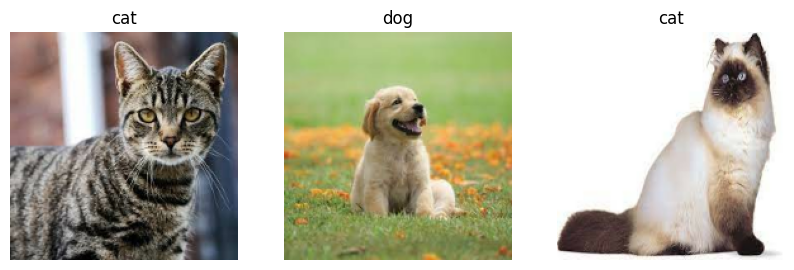

In [27]:
plt.figure(figsize = (10,5))
for img , lable in train_ds.take(1):
  for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(class_name[label[i]])
    plt.axis('off')

In [23]:
norm_layer = tf.keras.layers.Rescaling(scale=1./255)

In [25]:
import numpy as np

normalised_ds = train_ds.map(lambda x,y: (norm_layer(x), y))

imgs , lbl = next(iter(normalised_ds))

first_img = imgs[0]

print(np.min(first_img) , np.max(first_img))

0.0 1.0
